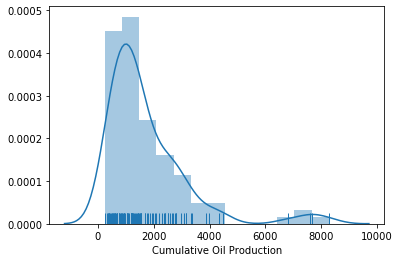

In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import glob
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
WP = pd.read_csv('well production.csv')
x = np.linspace(1,12,12)
WP['Cumulative Oil Production'] = WP.iloc[:,4:16].sum(axis=1)
WP= WP.sort_values('well name')
sns.distplot(WP['Cumulative Oil Production'], rug = True)


In [182]:
csv_files = glob.glob('Well Data/*.csv')
Peak6 = pd.read_csv('Well Data/Peak 6-217H.csv')
li = []
FN = []
TP = []
MPR = []
MPO = []
MPE = []
MP = []
MPOi = []
MT = []
ME = []
N = []
for files in csv_files:
    file = pd.read_csv(files)
    li.append(file.easting.max()-file.easting.min())
    FN.append(file['proppant weight (lbs)'].count())
    TP.append(file['proppant weight (lbs)'].sum())
    MP.append(file['proppant weight (lbs)'].mean())
    MPR.append(file['pump rate (cubic feet/min)'].mean())
    MPO.append(file['porosity'].mean())
    MPE.append(file['permeability'].mean())
    MPOi.append(file["Poisson's ratio"].mean())
    MT.append(file["thickness (ft)"].mean())
    N.append(file["northing"].mean())
    ME.append((file["easting"].max()+file['easting'].min())/2)
    
WP['Well Length'] = li
WP['Number of frac stages'] = FN
WP['Total Proppant weight (lbs)'] = TP
WP['Average Proppant weight (lbs) per stage'] = MP
WP['Average pump rate (cubic feet/min)'] = MPR
WP['Average Porosity'] = MPO
WP['Average Permeability'] = MPE
WP["Average Poisson's ratio"] = MPOi
WP['Average Thickness (ft)'] = MT
WP['Northing'] = N
WP['Middle Easting value'] = ME

In [181]:
Peak6.describe()
#sns.distplot(Peak6[""], rug = True)
#Peak6.permeability.describe()
#sns.distplot(Peak6.permeability, rug = True)

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,thickness (ft),proppant weight (lbs),pump rate (cubic feet/min)
count,100.000000,100.0,100.000000,100.00000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000
mean,81782.320000,1600.0,0.078500,0.02697,0.326620,6.277894e+06,0.081318,0.918682,27.492502,9.104229e+05,294.800448
std,2216.793798,0.0,0.013056,0.00999,0.003247,5.099620e+05,0.002052,0.002052,2.630183,4.516506e+05,51.187286
min,78000.000000,1600.0,0.040000,0.00700,0.321000,5.434035e+06,0.077797,0.914925,22.559422,1.862969e+04,179.223099
25%,79891.000000,1600.0,0.070000,0.01900,0.324000,5.832089e+06,0.079584,0.916989,25.279912,5.959234e+05,249.420366
50%,81782.500000,1600.0,0.080000,0.02600,0.327000,6.261940e+06,0.081276,0.918724,27.714355,8.342663e+05,296.918498
75%,83673.250000,1600.0,0.090000,0.03325,0.329000,6.721564e+06,0.083011,0.920416,29.845370,1.151494e+06,330.492695
max,85565.000000,1600.0,0.100000,0.05200,0.332000,7.162186e+06,0.085075,0.922203,31.432591,2.586512e+06,405.669215


In [44]:
WP['well name'].values

array(['Brisket 1-204H', 'Brisket 1-44H', 'Brisket 10-65H',
       'Brisket 2-149H', 'Brisket 3-212H', 'Brisket 6-50H',
       'Brisket 7-105H', 'Brisket 7-212H', 'Brisket 9-106H',
       'Burger 10-170H', 'Burger 2-179H', 'Burger 3-45H', 'Burger 6-148H',
       'Burger 6-59H', 'Dakota 10-199H', 'Dakota 13-166H',
       'Federal 12-111H', 'Federal 12-25H', 'Federal 14-113H',
       'Federal 3-123H', 'Federal 3-125H', 'Federal 7-130H',
       'Federal 8-142H', 'Federal 8-166H', 'Federal 8-38H',
       'Fennel 10-129H', 'Fennel 8-70H', 'Golden 1-209H',
       'Golden 11-109H', 'Golden 14-27H', 'Golden 4-21H', 'Golden 5-19H',
       'Golden 7-109H', 'Golden 8-162H', 'Golden 9-62H',
       'Gunnison 12-38H', 'Gunnison 13-160H', 'Gunnison 4-93H',
       'Gunnison 5-129H', 'Gunnison 7-24H', 'Gunnison 8-30H',
       'Johnson 7-3H', 'King 10-202H', 'King 12-179H', 'King 13-150H',
       'King 13-215H', 'King 13-28H', 'King 14-181H', 'King 14-184H',
       'King 2-120H', 'King 5-15H', 'King 7-1

In [183]:
WP.tail()

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,Number of frac stages,Total Proppant weight (lbs),Average pump rate (cubic feet/min),Average Porosity,Average Permeability,Average Proppant weight (lbs) per stage,Average Poisson's ratio,Average Thickness (ft),Northing,Middle Easting value
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,34,2.353841e+07,304.578816,0.0814,0.02966,692306.209005,0.31488,54.119562,12900.0,79389.5
43,Tribal 2-17H,36269180,0.107993,1.6,176.0,230.0,167.0,167.0,158.0,131.0,...,50,3.507593e+07,315.272511,0.0518,0.01107,701518.534064,0.33808,61.629917,18500.0,26993.0
70,Tribal 4-215H,34518701,0.102955,1.6,262.0,267.0,262.0,227.0,251.0,192.0,...,50,3.694735e+07,300.216433,0.0639,0.01792,738947.056410,0.30187,41.954475,36900.0,87154.5
75,Tribal 6-134H,35955602,0.085654,1.6,153.0,178.0,158.0,170.0,115.0,148.0,...,50,4.615338e+07,293.299566,0.0492,0.01048,923067.690420,0.34424,4.505779,5100.0,14240.0
92,Tribal 8-141H,45253022,0.100569,1.6,97.0,122.0,115.0,114.0,78.0,81.0,...,34,2.986000e+07,298.364963,0.0399,0.00673,878235.237880,0.30840,30.905207,72700.0,46411.5


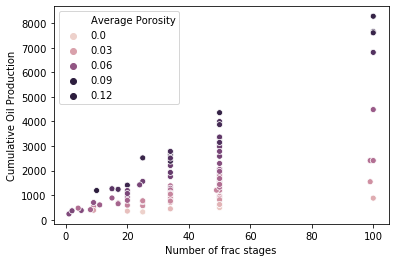

In [150]:

sns.scatterplot(WP['Number of frac stages'], WP['Cumulative Oil Production'],hue=WP['Average Porosity'])


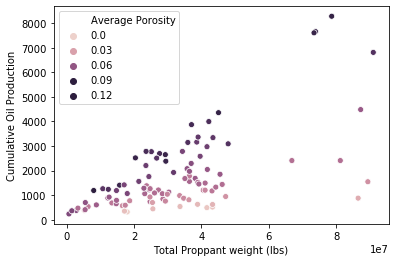

In [152]:
sns.scatterplot(WP['Total Proppant weight (lbs)'], WP['Cumulative Oil Production'], hue=WP['Average Porosity'])

In [143]:
X = WP.drop('well name', axis =1)
y = WP['Cumulative Oil Production']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state = 0)
clf = svm.SVC(kernel='linear',gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.0


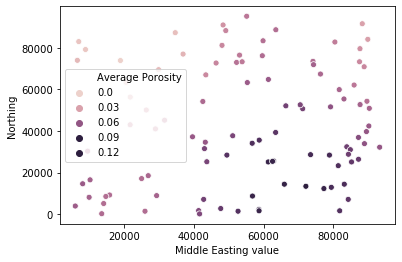

In [186]:
sns.scatterplot(WP['Middle Easting value'], WP['Northing'], hue = WP['Average Porosity'])